In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Feature Analysis

In [3]:
wine_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
wine_w['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

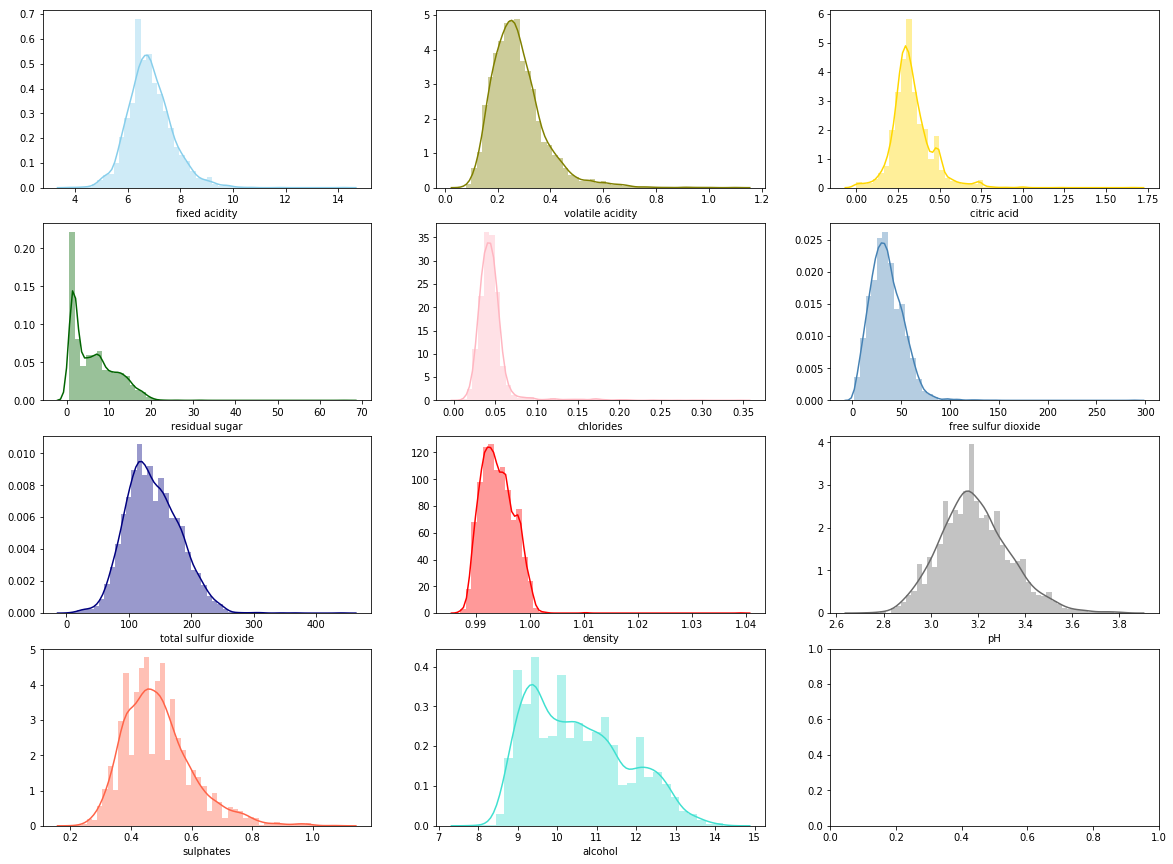

In [12]:
f, axes = plt.subplots(4, 3, figsize=(20, 15), sharex=False)
sns.distplot( wine_w["fixed acidity"] , color="skyblue",  ax=axes[0, 0])
sns.distplot( wine_w["volatile acidity"] , color="olive", ax=axes[0, 1])
sns.distplot( wine_w["citric acid"] , color="gold", ax=axes[0, 2])
sns.distplot( wine_w["residual sugar"] , color="darkgreen", ax=axes[1, 0])
sns.distplot( wine_w["chlorides"] , color="lightpink", ax=axes[1, 1])
sns.distplot( wine_w["free sulfur dioxide"] , color="steelblue", ax=axes[1, 2])
sns.distplot( wine_w["total sulfur dioxide"] , color="navy", ax=axes[2, 0])
sns.distplot( wine_w["density"] , color="r", ax=axes[2, 1])
sns.distplot( wine_w["pH"] , color="dimgrey", ax=axes[2, 2])
sns.distplot( wine_w["sulphates"] , color="tomato", ax=axes[3, 0])
sns.distplot( wine_w["alcohol"] , color="turquoise", ax=axes[3, 1])
#sns.distplot( wine_w["quality"] , color="coral", ax=axes[3, 2])

In [13]:
wine_w.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


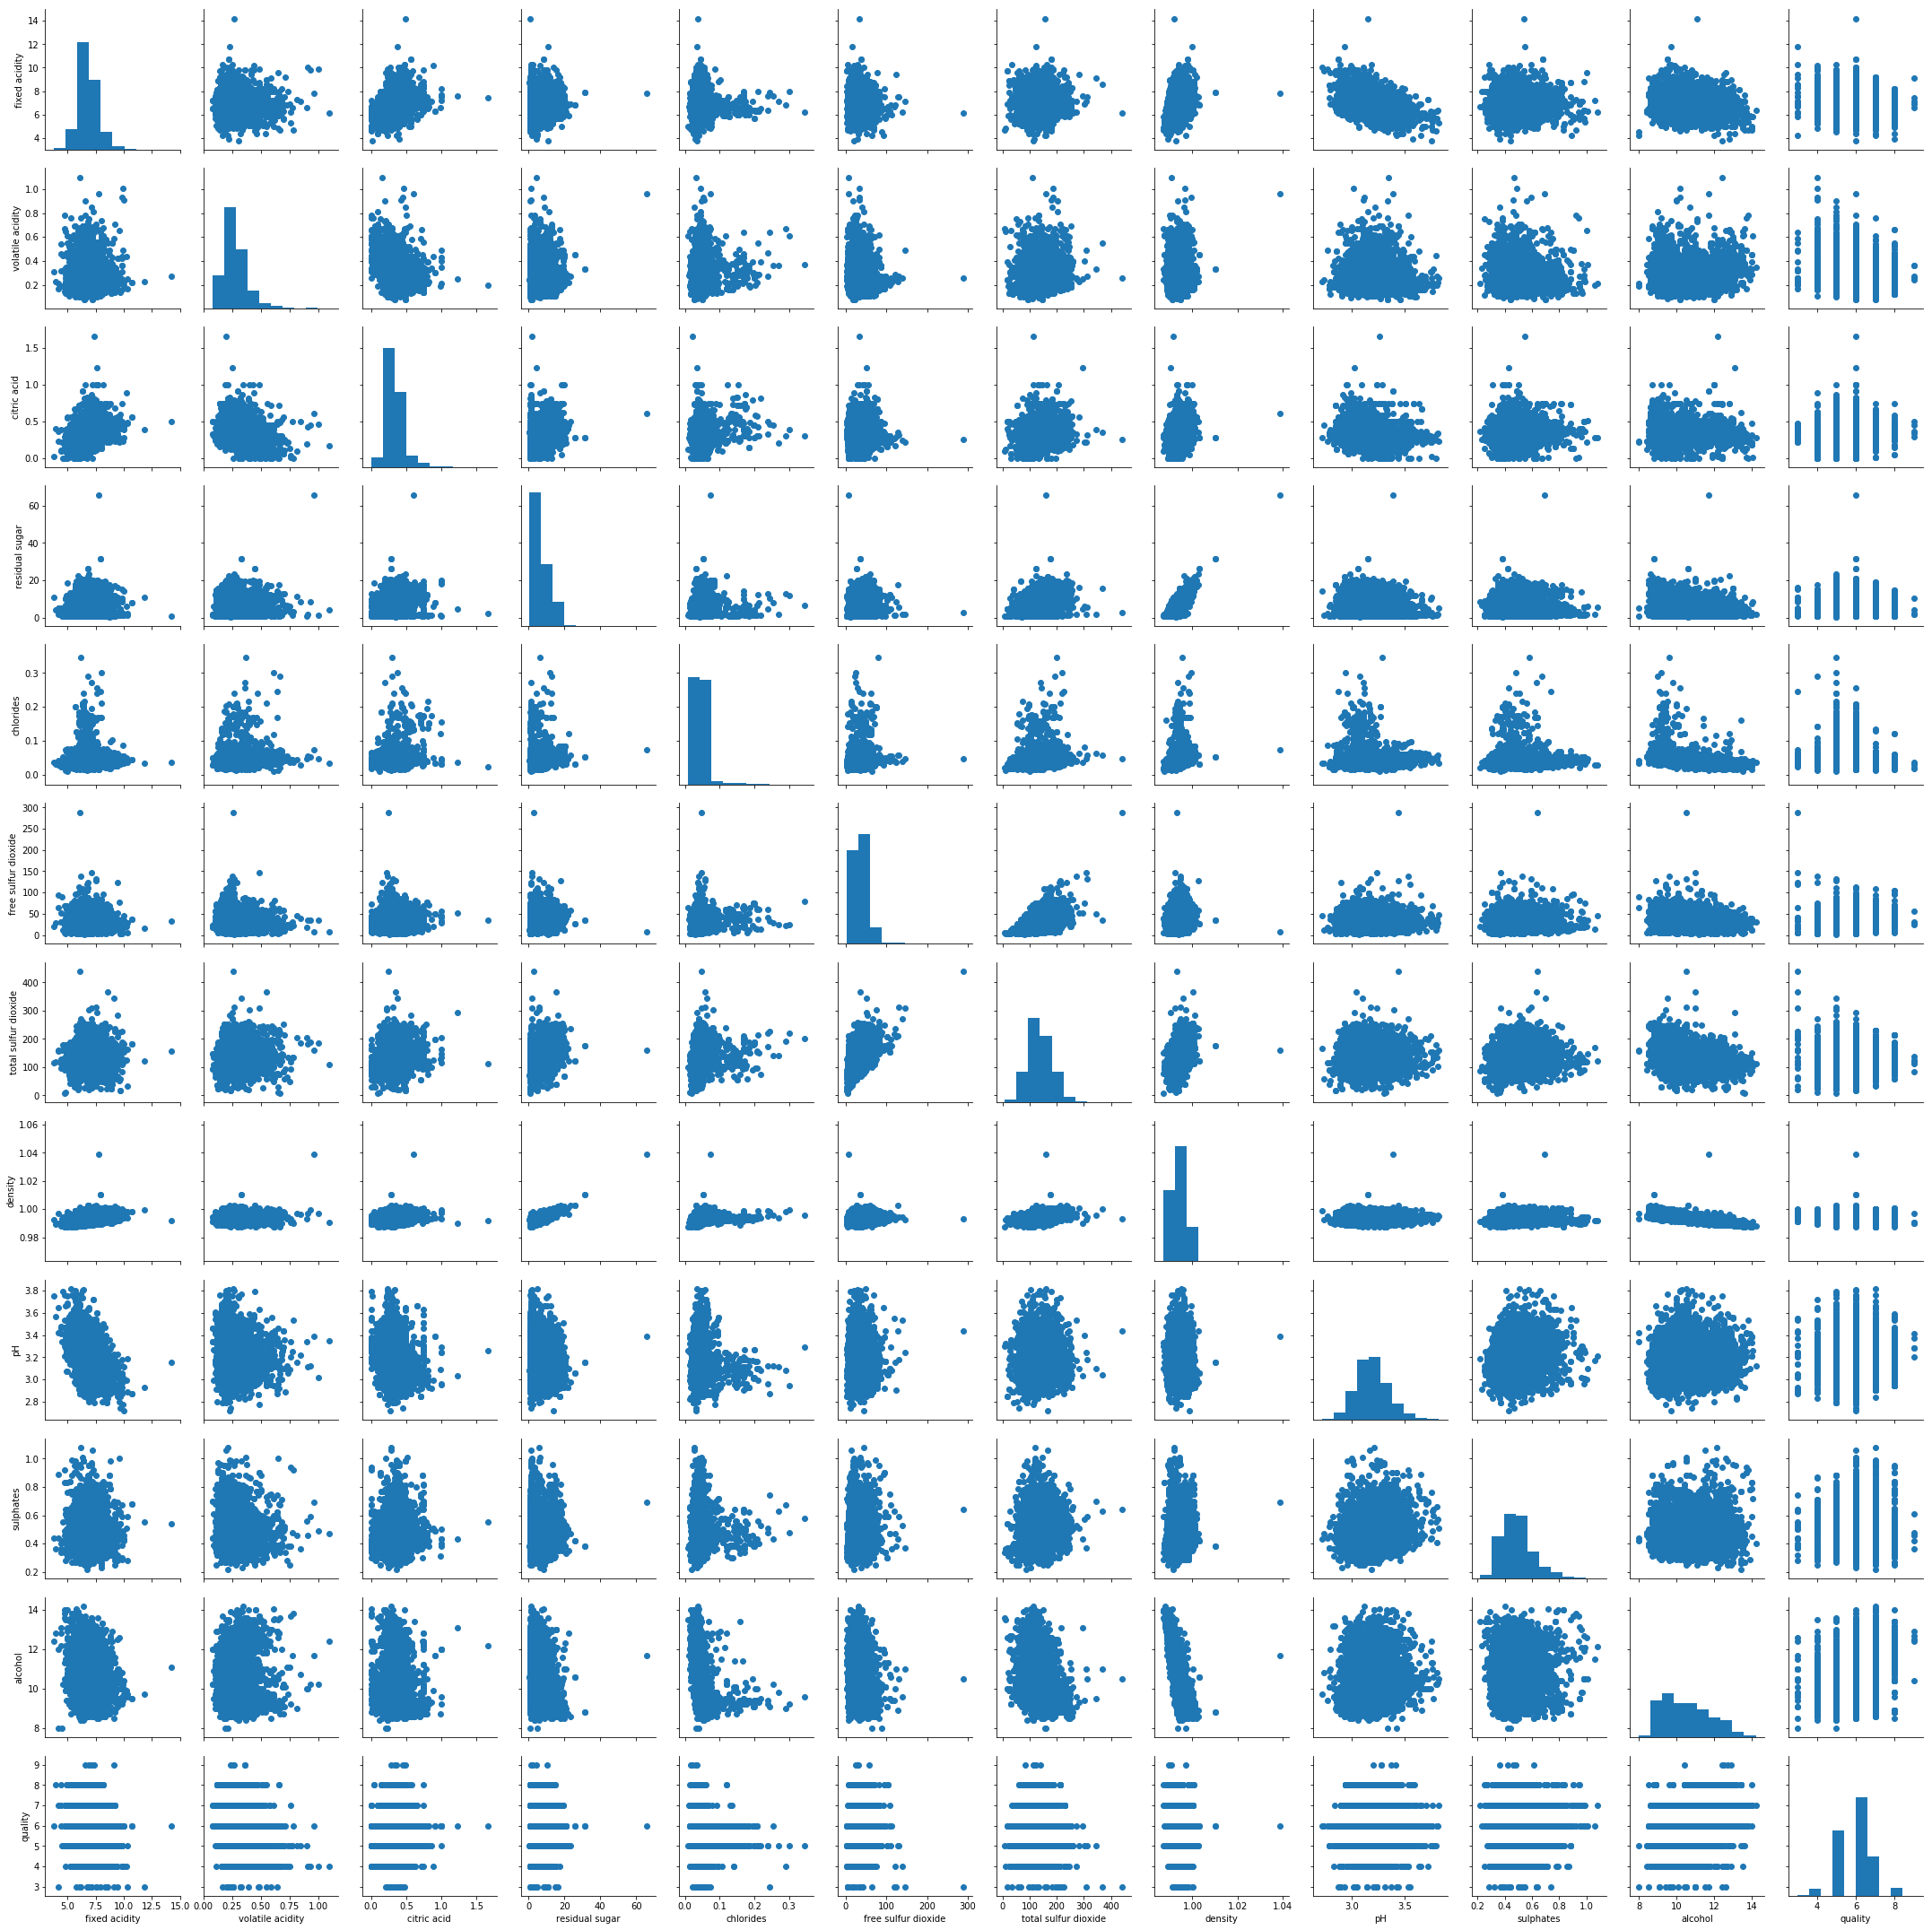

In [14]:
ax = sns.PairGrid(wine_w)
ax = ax.map_diag(plt.hist) 
ax = ax.map_offdiag(plt.scatter)

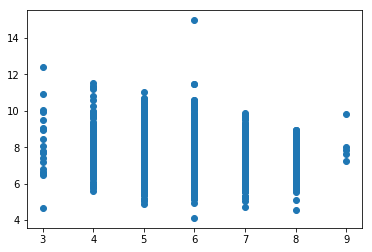

In [22]:
#feature exploring
plt.scatter(wine_w["quality"],wine_w['fixed acidity']+wine_w['volatile acidity']+wine_w['citric acid'])

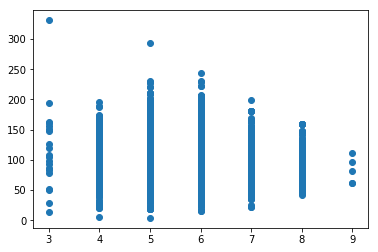

In [13]:
plt.scatter(wine_w["quality"],wine_w['total sulfur dioxide']-wine_w['free sulfur dioxide'])

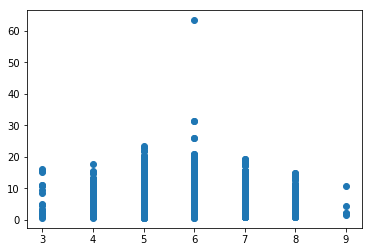

In [17]:
plt.scatter(wine_w["quality"],wine_w['residual sugar']/wine_w['density'])

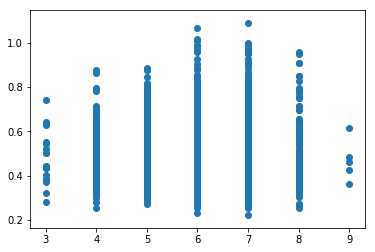

In [21]:
plt.scatter(wine_w["quality"],wine_w['sulphates']/wine_w['density'])

In [38]:
#drop anormaly
wine_w.sort_values(by=['residual sugar'],ascending=False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6


In [48]:
wine_w.sort_values(by=['free sulfur dioxide'],ascending=False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4745,6.1,0.260,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3
1931,7.1,0.490,0.22,2.0,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
3050,6.2,0.255,0.24,1.7,0.039,138.5,272.0,0.99452,3.53,0.53,9.6,4
325,7.5,0.270,0.31,5.8,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
2334,7.5,0.230,0.35,17.8,0.058,128.0,212.0,1.00241,3.44,0.43,8.9,5


In [49]:
wine_w.sort_values(by=['density'],ascending=False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6


In [50]:
wine_w.sort_values(by=['fixed acidity'],ascending=False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1526,14.2,0.27,0.49,1.1,0.037,33.0,156.0,0.9920,3.15,0.54,11.1,6
2050,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.9997,2.93,0.55,9.7,3
1372,10.7,0.22,0.56,8.2,0.044,37.0,181.0,0.9980,2.87,0.68,9.5,6
1373,10.7,0.22,0.56,8.2,0.044,37.0,181.0,0.9980,2.87,0.68,9.5,6
873,10.3,0.17,0.47,1.4,0.037,5.0,33.0,0.9939,2.89,0.28,9.6,3


In [51]:
wine_1 = wine_w.drop(index=2781,axis=0)
wine_1 = wine_1.drop(index=4745,axis=0)
wine_1 = wine_1.drop(index=1526,axis=0)

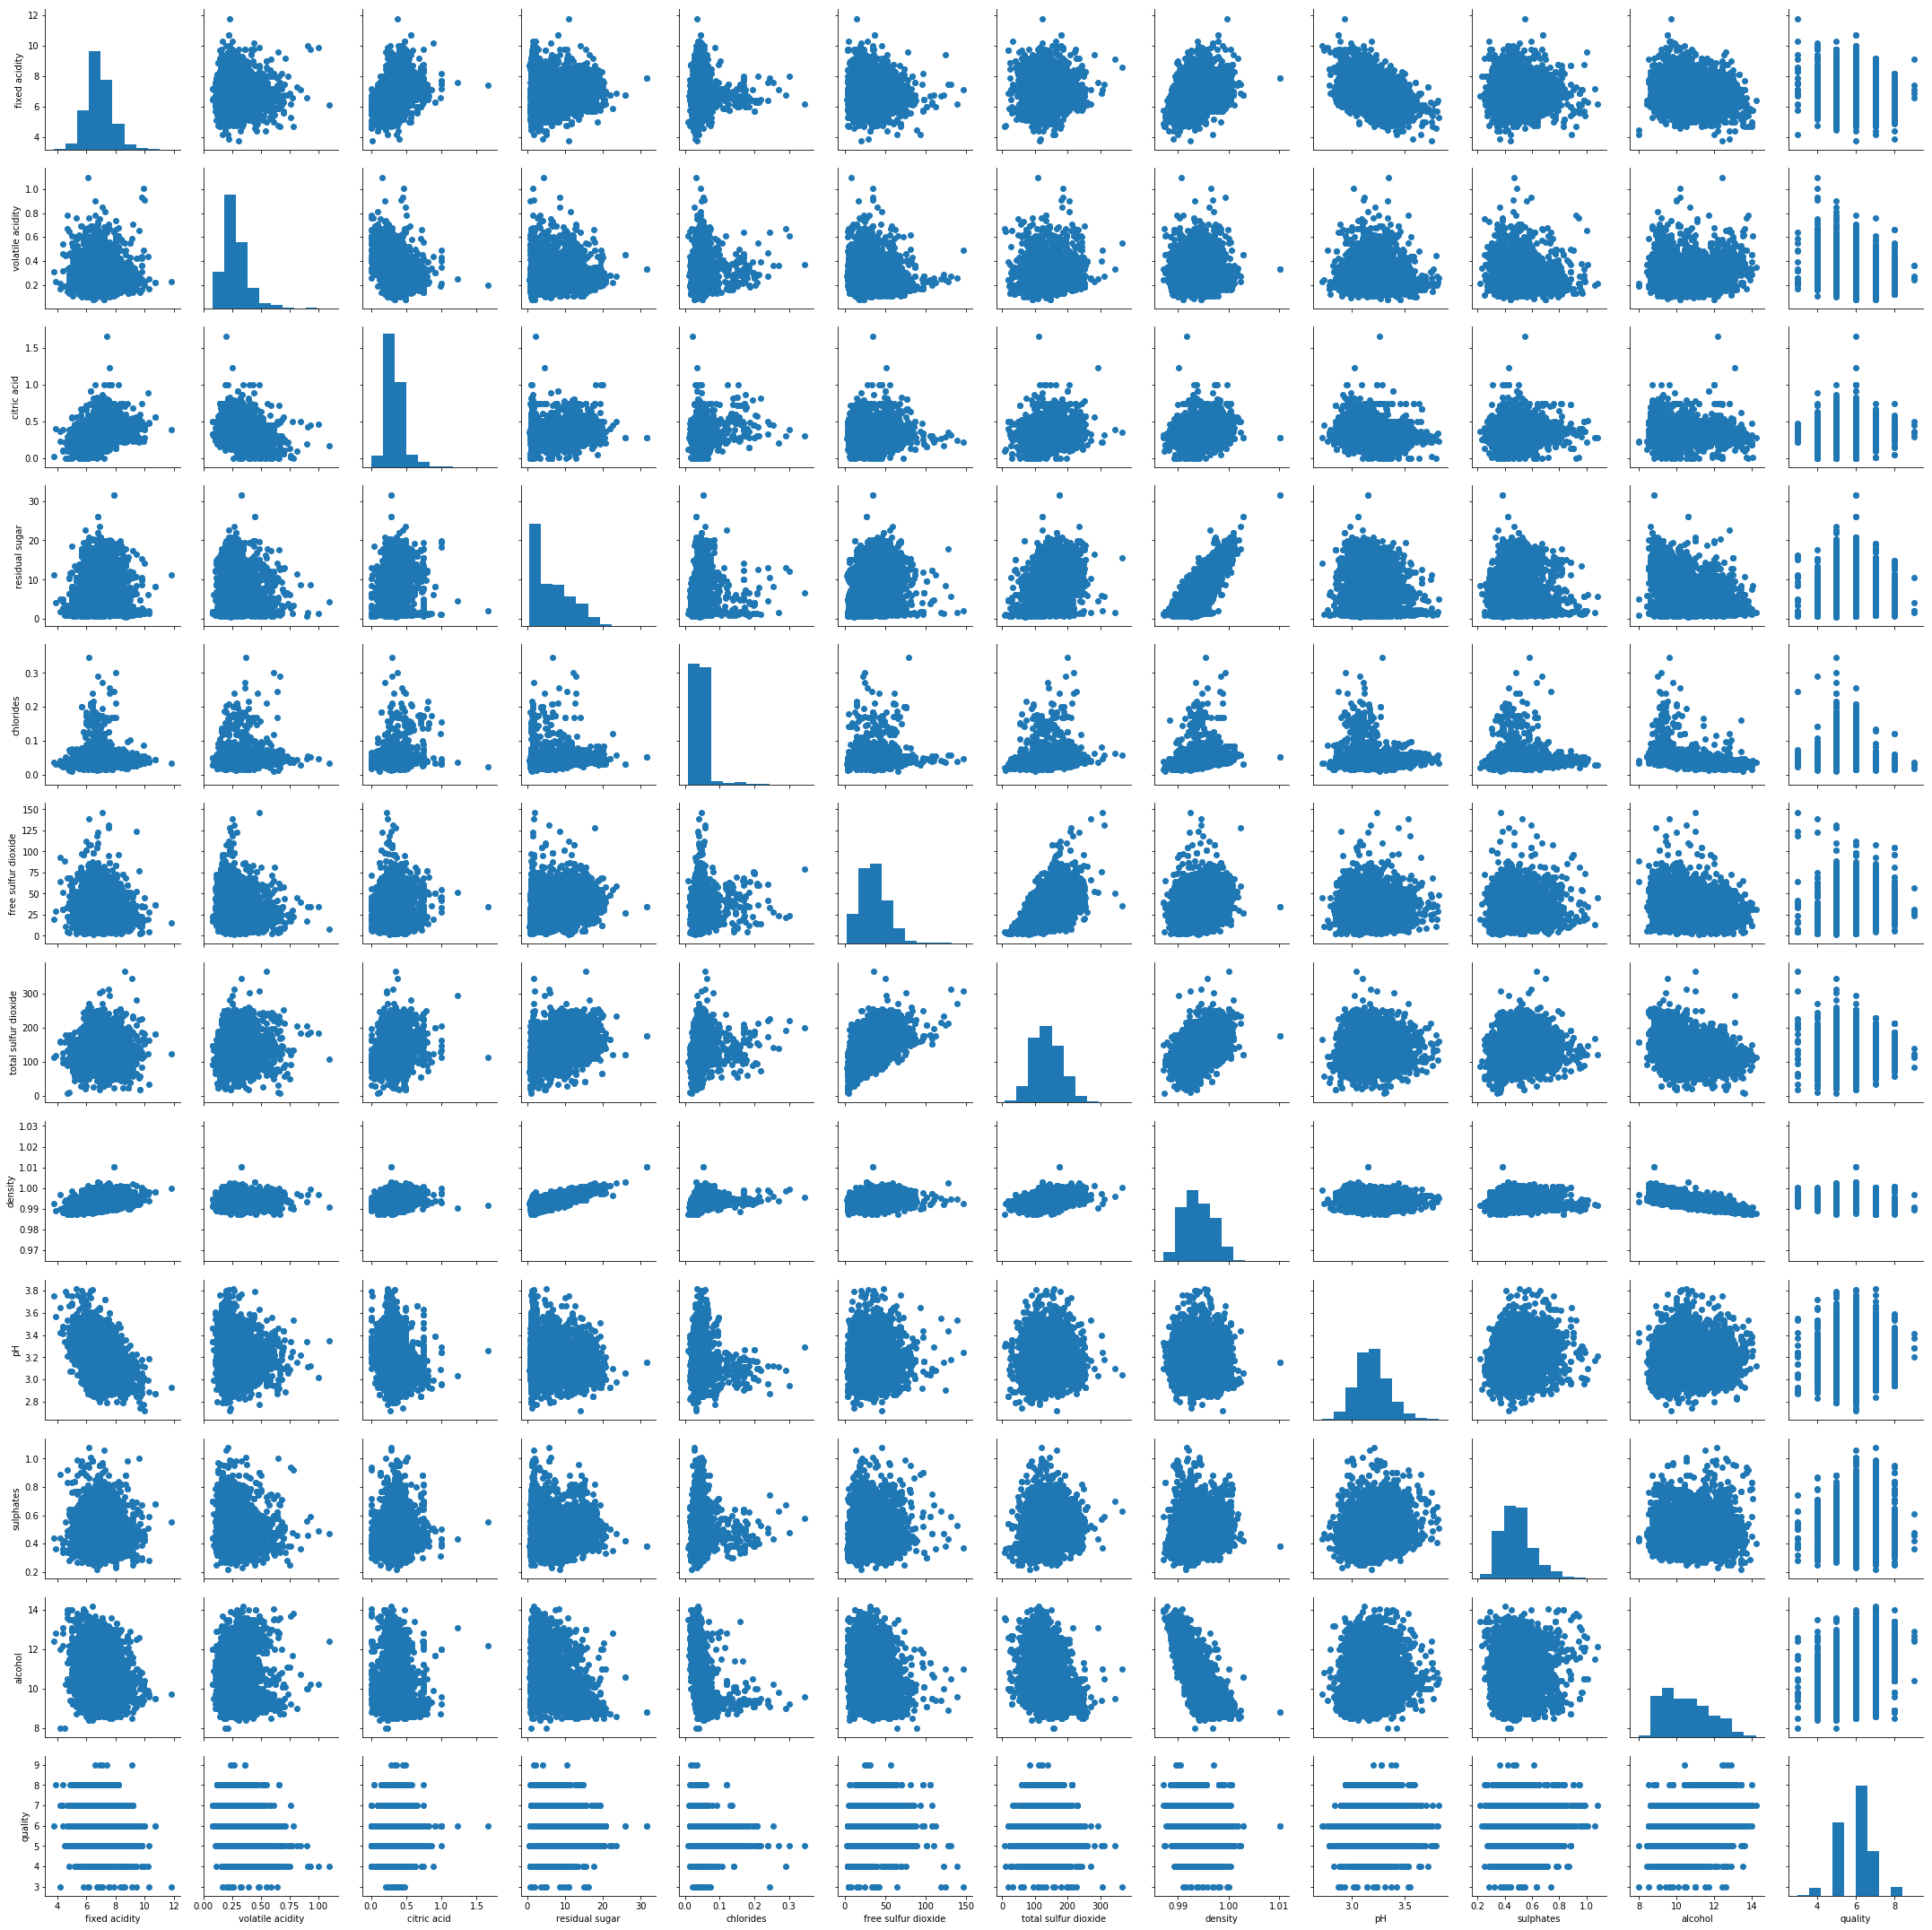

In [52]:
ax_1 = sns.PairGrid(wine_1)
ax_1 = ax_1.map_diag(plt.hist) 
ax_1 = ax_1.map_offdiag(plt.scatter)

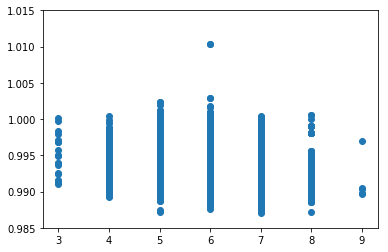

In [56]:
plt.ylim(0.985,1.015)
plt.scatter(wine_1["quality"],wine_1['density'])

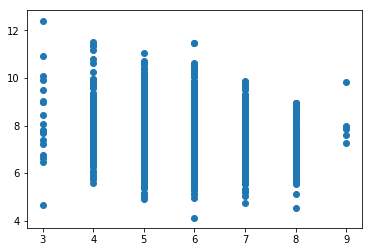

In [58]:
plt.scatter(wine_1["quality"],wine_1['fixed acidity']+wine_1['volatile acidity']+wine_1['citric acid'])


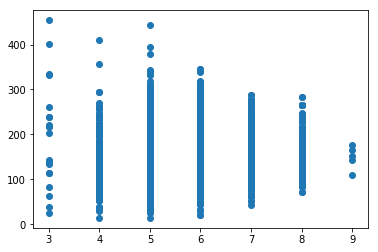

In [68]:
plt.scatter(wine_1["quality"],wine_1['total sulfur dioxide']+wine_1['free sulfur dioxide'])

## Red Wines

In [14]:
wine_r = pd.read_csv("winequality-red.csv", sep=';')
wine_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
wine_r.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


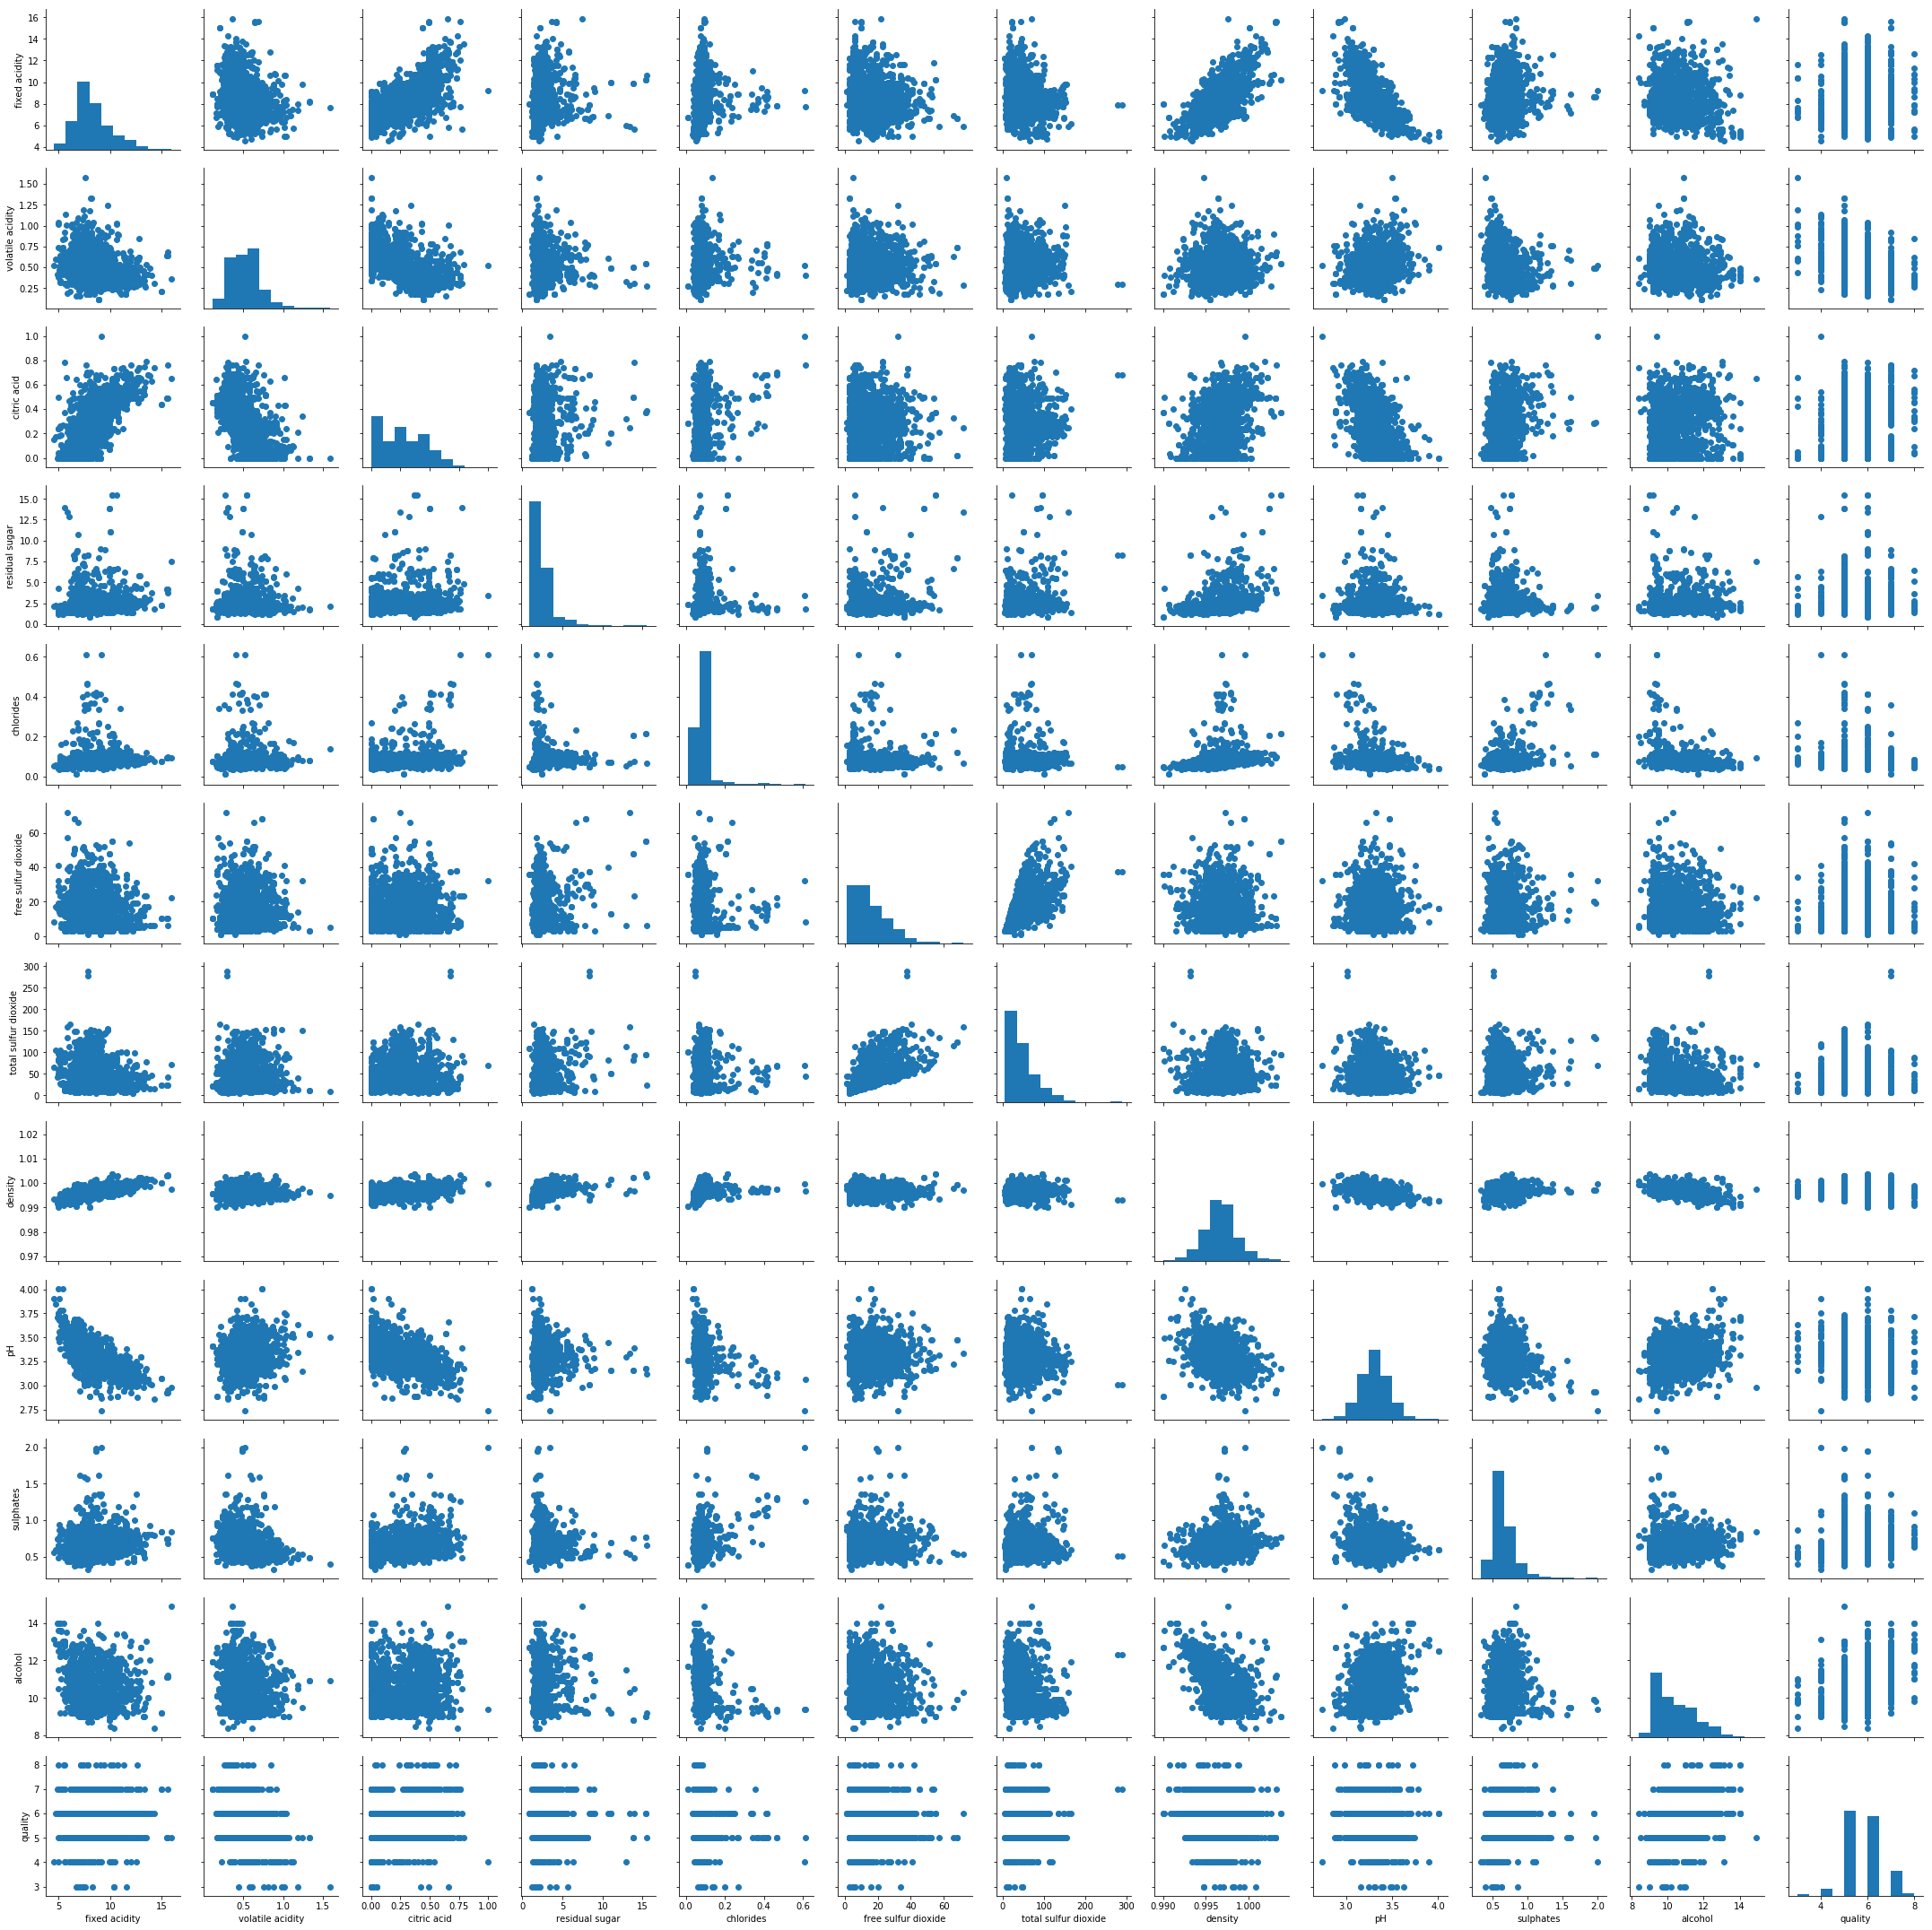

In [16]:
ax_r = sns.PairGrid(wine_r)
ax_r = ax_r.map_diag(plt.hist) 
ax_r = ax_r.map_offdiag(plt.scatter)